In [4]:
# 데이터 구성: Series, DataFrame
import pandas as pd
import numpy as np


#탐색적 분석을 위한 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import shapiro


from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

#ARIMA
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import accuracy_score #평가함수
from sklearn.preprocessing import StandardScaler #SCALING

#matplotlib 이용한 background 그래프 실행 및 결과 확인 
%matplotlib inline


#export_graphviz: 나무구조 생성 및 저장
from sklearn.tree import export_graphviz
#graphviz: 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
import graphviz


# 데이터 분할: train,test
from sklearn.model_selection import train_test_split

#데이터 scaling => 거리기반 알고리즘은 필수!!!
from statsmodels.api import Logit #로지스틱 회귀FL
from sklearn.preprocessing import StandardScaler
# 데이터 분할: train,test
from sklearn.model_selection import train_test_split
# 분류 DT
from sklearn.tree import DecisionTreeClassifier
#분류  RF
from sklearn.ensemble import RandomForestClassifier
# 분류 GB
from sklearn.ensemble import GradientBoostingClassifier
# 분류 SVM
from sklearn.svm import SVC
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 분류 NN
from sklearn.neural_network import MLPClassifier

# 최적모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 모델 성능 평가 
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


In [5]:
# 한글 폰트 적용
font_path = '/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family = font_name)

In [7]:
# 데이터 구성하기(MFG_PROCESS)
MFG_PROCESS = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/outlier/MFG_PROCESS_NULL_COL_OUT.csv", engine="python", encoding='EUC-KR')
#MFG_PROCESS = MFG_PROCESS.drop(MFG_PROCESS.columns[0], axis=1)

In [8]:
MFG_PROCESS['JUDGE'] = MFG_PROCESS['JUDGE'].map({'양품':0,'명점':1})

# 로지스틱 회귀 (노스케일) - MFG_PROCESS

In [9]:
df_train, df_test = train_test_split(MFG_PROCESS, test_size = 0.3, random_state = 1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (2787, 81)
test data size: (1195, 81)


In [10]:
log_model = Logit.from_formula(""'JUDGE~AG_RTD_TEMP_GLASS_OUT+BUS_DEVELOP_TEMP_TANK2+DIELEC_FIRE_EXHAUST_HEAT5+\
                               PHOS_R_DRY_TEMP_WALL_MAX+PHOS_R_DRY_TEMP_HOOD_MAX+PHOS_FIRE_EXHAUST_HEAT3+\
                               BUS_DEVELOP_TEMP_TANK1+AG_EXPOSURE_TEMP_MASK+PHOS_FIRE_EXHAUST_HEAT2+\
                               PHOS_R_DRY_TEMP_GLASS_END+PHOS_G_DRY_TEMP_HOOD_START'"", df_train)
#BUS_DEVELOP_PRES1 제거함 (데이터 값이 전원 0이라서 P값 std err 값 nan 뜸
log_result = log_model.fit(method='bfgs')
print(log_result.summary())

         Current function value: 0.190983
         Iterations: 35
         Function evaluations: 53
         Gradient evaluations: 44
                           Logit Regression Results                           
Dep. Variable:                  JUDGE   No. Observations:                 2787
Model:                          Logit   Df Residuals:                     2775
Method:                           MLE   Df Model:                           11
Date:                Sun, 23 Feb 2020   Pseudo R-squ.:                  0.4529
Time:                        22:25:04   Log-Likelihood:                -532.27
converged:                      False   LL-Null:                       -972.89
Covariance Type:            nonrobust   LLR p-value:                6.694e-182
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.0059     39

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [11]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

79      0
3760    0
3406    0
2955    0
1081    0
dtype: int64

In [12]:
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["JUDGE"],y_pred_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["JUDGE"],y_pred_class)))

Accuracy: 0.941

Confusion Matrix:
[[1064   20]
 [  50   61]]


In [13]:
df_logistic_coef=pd.DataFrame({"Coef":log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.sort_values("Coef", ascending = False)

,Coef
BUS_DEVELOP_TEMP_TANK2,2.282058
AG_RTD_TEMP_GLASS_OUT,1.134929
AG_EXPOSURE_TEMP_MASK,0.880472
DIELEC_FIRE_EXHAUST_HEAT5,-0.001249
PHOS_FIRE_EXHAUST_HEAT2,-0.003453
PHOS_FIRE_EXHAUST_HEAT3,-0.006676
PHOS_R_DRY_TEMP_WALL_MAX,-0.050157
PHOS_G_DRY_TEMP_HOOD_START,-0.070806
PHOS_R_DRY_TEMP_HOOD_MAX,-0.086382
PHOS_R_DRY_TEMP_GLASS_END,-0.317657


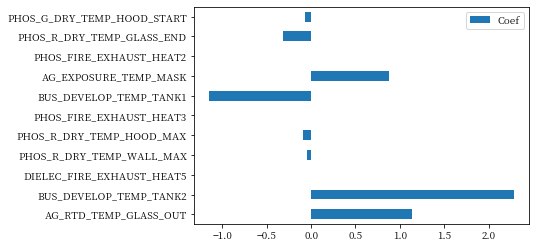

In [14]:
df_logistic_coef.plot.barh(y="Coef")

In [17]:
# RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적 제거
# 목표 변수 분리
df_y = MFG_PROCESS['JUDGE']
# df_x = MFG_PROCESS.drop(['JUDGE',"LOT_ID","PANEL_ID",'TIME_1BLACK',"TIME_2AG","TIME_3BUS","TIME_4DIELEC","TIME_5MGO","TIME_6PHOS","TIME_7PASTE","TIME_8AGING"], axis=1, inplace=False)
#df_x = MFG_PROCESS.drop(['JUDGE'], axis=1, inplace=False)
df_x = MFG_PROCESS[['AG_RTD_TEMP_GLASS_OUT','BUS_DEVELOP_TEMP_TANK2','DIELEC_FIRE_EXHAUST_HEAT5',
                               'PHOS_R_DRY_TEMP_WALL_MAX','PHOS_R_DRY_TEMP_HOOD_MAX','PHOS_FIRE_EXHAUST_HEAT3',
                               'BUS_DEVELOP_TEMP_TANK1','AG_EXPOSURE_TEMP_MASK','PHOS_FIRE_EXHAUST_HEAT2',
                               'PHOS_R_DRY_TEMP_GLASS_END','PHOS_G_DRY_TEMP_HOOD_START']]
df5_dummy_x = pd.get_dummies(df_x)
df_x = df5_dummy_x


# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택


In [18]:
#로지스틱 회귀 모델 불러옴

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#rfe = RFE(model, 8)
#fit = rfe.fit(X, y)
rfe = RFE(estimator = model, n_features_to_select = 7).fit(df_x, df_y)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [19]:
selected_cols = df_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_x.columns[~rfe.support_]
print('Selected Variables: {}'.format(selected_cols))
print("\n\n\n\n")
print('Removed Variables: {}'.format(removed_cols))

Selected Variables: Index(['AG_RTD_TEMP_GLASS_OUT', 'BUS_DEVELOP_TEMP_TANK2',
       'PHOS_R_DRY_TEMP_WALL_MAX', 'PHOS_R_DRY_TEMP_HOOD_MAX',
       'BUS_DEVELOP_TEMP_TANK1', 'AG_EXPOSURE_TEMP_MASK',
       'PHOS_R_DRY_TEMP_GLASS_END'],
      dtype='object')





Removed Variables: Index(['DIELEC_FIRE_EXHAUST_HEAT5', 'PHOS_FIRE_EXHAUST_HEAT3',
       'PHOS_FIRE_EXHAUST_HEAT2', 'PHOS_G_DRY_TEMP_HOOD_START'],
      dtype='object')


In [20]:
df_x_rfe = df_x[selected_cols]
df_x_rfe_const = add_constant(df_x_rfe)
df_rfe_vif = pd.DataFrame()
df_rfe_vif['variable'] = df_x_rfe_const.columns
df_rfe_vif['VIF'] = [variance_inflation_factor(df_x_rfe_const.values, i) for i in range(df_x_rfe_const.shape[1])]
df_rfe_vif.sort_values('VIF', inplace=True)
df_rfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,AG_RTD_TEMP_GLASS_OUT,1.033
6,AG_EXPOSURE_TEMP_MASK,1.150
4,PHOS_R_DRY_TEMP_HOOD_MAX,1.155
2,BUS_DEVELOP_TEMP_TANK2,1.273
5,BUS_DEVELOP_TEMP_TANK1,1.276
7,PHOS_R_DRY_TEMP_GLASS_END,1.452
3,PHOS_R_DRY_TEMP_WALL_MAX,1.511
0,const,222564.601
